In [1]:
from langgraph.graph import StateGraph, START, MessagesState
from langgraph.checkpoint.memory import InMemorySaver
from dotenv import load_dotenv

from langchain_cerebras import ChatCerebras 
from langchain_core.messages.utils import trim_messages,count_tokens_approximately

c:\Users\panka\anaconda3\envs\genai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv()


True

In [3]:
model=ChatCerebras(model='llama-3.3-70b')

In [4]:
MAX_TOKENS = 150


In [5]:
def call_model(state: MessagesState):
    
    # Trim conversation history -> last N messages that fit within the token budget
    messages = trim_messages(
        state["messages"],
        strategy="last",                      
        token_counter=count_tokens_approximately,
        max_tokens=MAX_TOKENS
    )

    print('Current Token Count ->', count_tokens_approximately(messages=messages))

    for message in messages:
        print(message.content)

    response = model.invoke(messages)

    return {"messages": [response]}

In [6]:

builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")

In [7]:

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

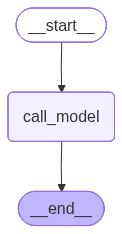

In [8]:
graph


In [9]:

config = {"configurable": {"thread_id": "chat-1"}}

result = graph.invoke(
    {"messages": [{"role": "user", "content": "Hi, my name is Pankaj."}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 10
Hi, my name is Pankaj.


'Nice to meet you, Pankaj. Is there something I can help you with or would you like to chat?'

In [10]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "I am learning LangGraph."}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 48
Hi, my name is Pankaj.
Nice to meet you, Pankaj. Is there something I can help you with or would you like to chat?
I am learning LangGraph.


"LangGraph is a fascinating topic. It's a graphical representation of language models, which can help in understanding and visualizing the relationships between different concepts and entities in a language.\n\nWhat specific aspects of LangGraph are you learning about? Are you exploring its applications in natural language processing, knowledge graph construction, or something else? I'm here to help if you have any questions or need clarification on any concepts."

In [11]:

result = graph.invoke(
    {"messages": [{"role": "user", "content": "what is the capital of india?"}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 144
I am learning LangGraph.
LangGraph is a fascinating topic. It's a graphical representation of language models, which can help in understanding and visualizing the relationships between different concepts and entities in a language.

What specific aspects of LangGraph are you learning about? Are you exploring its applications in natural language processing, knowledge graph construction, or something else? I'm here to help if you have any questions or need clarification on any concepts.
what is the capital of india?


'The capital of India is **New Delhi**.'

In [12]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "What is my name?"}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 35
what is the capital of india?
The capital of India is **New Delhi**.
What is my name?


"I don't know your name. I'm a large language model, I don't have the ability to know personal information about you, including your name, unless you choose to share it with me. If you'd like to share your name, I'd be happy to chat with you and use it in our conversation!"

In [13]:
for item in graph.get_state({"configurable": {"thread_id": "chat-1"}}).values['messages']:
    print(item.content)
    print('-'*120)

Hi, my name is Pankaj.
------------------------------------------------------------------------------------------------------------------------
Nice to meet you, Pankaj. Is there something I can help you with or would you like to chat?
------------------------------------------------------------------------------------------------------------------------
I am learning LangGraph.
------------------------------------------------------------------------------------------------------------------------
LangGraph is a fascinating topic. It's a graphical representation of language models, which can help in understanding and visualizing the relationships between different concepts and entities in a language.

What specific aspects of LangGraph are you learning about? Are you exploring its applications in natural language processing, knowledge graph construction, or something else? I'm here to help if you have any questions or need clarification on any concepts.
--------------------------------